<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-07-18 21:55:54--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip’

LoanStats_2019Q1.cs     [    <=>             ]  19.30M   885KB/s    in 22s     

2019-07-18 21:56:17 (879 KB/s) - ‘LoanStats_2019Q1.csv.zip’ saved [20240936]



In [2]:
!ls

LoanStats_2019Q1.csv.zip  sample_data


In [3]:
!unzip LoanStats_2019Q1.csv.zip

Archive:  LoanStats_2019Q1.csv.zip
  inflating: LoanStats_2019Q1.csv    


In [4]:
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd

In [6]:
df = pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(115675, 144)


id  member_id  ...  settlement_percentage  settlement_term
0 NaN        NaN  ...                    NaN              NaN
1 NaN        NaN  ...                    NaN              NaN
2 NaN        NaN  ...                    NaN              NaN
3 NaN        NaN  ...                    NaN              NaN
4 NaN        NaN  ...                    NaN              NaN

[5 rows x 144 columns]

In [7]:
df.isna().sum()

id                                            115675
member_id                                     115675
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19518
emp_length                                     11101
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [8]:
df[df['loan_amnt'].isna()]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

[0 rows x 144 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(56), int64(52), object(36)
memory usage: 127.1+ MB


In [0]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [11]:
df.head().T

0  \
id                                                            NaN   
member_id                                                     NaN   
loan_amnt                                                   20000   
funded_amnt                                                 20000   
funded_amnt_inv                                             20000   
term                                                    60 months   
int_rate                                                   17.19%   
installment                                                 499.1   
grade                                                           C   
sub_grade                                                      C5   
emp_title                                   Front desk supervisor   
emp_length                                                6 years   
home_ownership                                               RENT   
annual_inc                                                  47000   
verification_status                               Source Verified   
issue_d                                                  Mar-2019   
loan_status                                               Current   
pymnt_plan                                                      n   
url                                                           NaN   
desc                                                          NaN   
purpose                                        debt_consolidation   
title                                          Debt consolidation   
zip_code                                                    958xx   
addr_state                                                     CA   
dti                                                         14.02   
delinq_2yrs                                                     0   
earliest_cr_line                                         Sep-2006   
inq_last_6mths                                                  1   
mths_since_last_delinq                                         50   
mths_since_last_record                                        NaN   
open_acc                                                       15   
pub_rec                                                         0   
revol_bal                                                   10687   
revol_util                                                  19.7%   
total_acc                                                      53   
initial_list_status                                             w   
out_prncp                                                 19254.8   
out_prncp_inv                                             19254.8   
total_pymnt                                                1459.1   
total_pymnt_inv                                            1459.1   
total_rec_prncp                                            745.24   
total_rec_int                                              713.86   
total_rec_late_fee                                              0   
recoveries                                                      0   
collection_recovery_fee                                         0   
last_pymnt_d                                             Jun-2019   
last_pymnt_amnt                                             499.1   
next_pymnt_d                                             Jul-2019   
last_credit_pull_d                                       Jun-2019   
collections_12_mths_ex_med                                      0   
mths_since_last_major_derog                                    50   
policy_code                                                     1   
application_type                                       Individual   
annual_inc_joint                                              NaN   
dti_joint                                                     NaN   
verification_status_joint                                     NaN   
acc_now_delinq                                                  0   
tot_coll_amt                                                  

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [12]:
df.describe(include='object')

term int_rate   grade sub_grade emp_title emp_length  \
count       115675   115675  115675    115675     96157     104574   
unique           2       53       7        33     39387         11   
top      36 months    8.19%       A        A4   Teacher  10+ years   
freq         78429    11314   37060     11314      2037      34490   

       home_ownership verification_status   issue_d loan_status pymnt_plan  \
count          115675              115675    115675      115675     115675   
unique              5                   3         3           6          1   
top          MORTGAGE        Not Verified  Jan-2019     Current          n   
freq            58578               54608     43584      109176     115675   

                   purpose               title zip_code addr_state  \
count               115675              115675   115675     115675   
unique                  12                  12      877         50   
top     debt_consolidation  Debt consolidation    750xx         CA   
freq                 63747               63747     1162      15902   

       earliest_cr_line revol_util initial_list_status last_pymnt_d  \
count            115675     115546              115675       115445   
unique              652       1055                   2            7   
top            Aug-2006         0%                   w     Jun-2019   
freq               1033       1054              101423       102101   

       next_pymnt_d last_credit_pull_d application_type  \
count        110769             115673           115675   
unique            3                  7                2   
top        Jul-2019           Jun-2019       Individual   
freq         110738             111240            98994   

       verification_status_joint sec_app_earliest_cr_line hardship_flag  \
count                      14624                    16681        115675   
unique                         3                      577             2   
top                 Not Verified                 Aug-2006             N   
freq                        6395                      150        115674   

                          hardship_type     hardship_reason hardship_status  \
count                                 1                   1               1   
unique                                1                   1               1   
top     INTEREST ONLY-3 MONTHS DEFERRAL  INCOME_CURTAILMENT          ACTIVE   
freq                                  1                   1               1   

       hardship_start_date hardship_end_date payment_plan_start_date  \
count                    1                 1                       1   
unique                   1                 1                       1   
top               Jun-2019          Sep-2019                Jul-2019   
freq                     1                 1                       1   

       hardship_loan_status debt_settlement_flag debt_settlement_flag_date  \
count                     1               115675                         1   
unique                    1                    2                         1   
top         In Grace Period                    N                  May-2019   
freq                      1               115674                         1   

       settlement_status settlement_date  
count                  1               1  
unique                 1               1  
top               ACTIVE        May-2019  
freq                   1               1

### Convert `int_rate`



In [13]:
# start small and work up
x = '12.5%'

x = x.strip('%')
float(x)

# teacher used float(x.strip('%'))

12.5

In [14]:
# df['int_rate'] = df['int_rate'].str.strip('%').astype(float)
'''I commented this out because after I ran it once it errored out due to being unable to convert a float into a float'''

'I commented this out because after I ran it once it errored out due to being unable to convert a float into a float'

In [15]:
df['int_rate'].head()

0     17.19%
1     16.40%
2     14.74%
3     15.57%
4     15.57%
Name: int_rate, dtype: object

Define a function to remove percent signs from strings and convert to floats

In [0]:
def percent_converter(string):
  '''This function makes a string as input, strips the trailing percent sign, and returns float interest rate.'''
  return float(string.strip('%'))



Apply the function to the `int_rate` column

In [21]:
df['int_rate'] = df['int_rate'].apply(percent_converter)
'''When applying a function to a column, do it this way'''

'When applying a function to a column, do it this way'

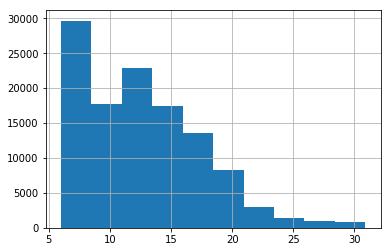

In [22]:
df['int_rate'].hist();
# plt.show()

### Clean `emp_title`

Look at top 20 titles

In [23]:
df['emp_title'].value_counts().head(20)

Teacher                     2037
Manager                     1626
Registered Nurse             898
Driver                       857
Supervisor                   655
RN                           623
Sales                        586
Office Manager               574
Project Manager              540
General Manager              486
Owner                        449
Director                     374
Operations Manager           313
Engineer                     309
Truck Driver                 308
Sales Manager                288
Nurse                        281
Administrative Assistant     267
Supervisor                   260
Accountant                   259
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [24]:
df['emp_title'].isna().sum() / len(df)

0.1687313594121461

In [25]:
isinstance('dog', str)

True

Clean the title and handle missing values

In [26]:
# Make sure that everything is capitalized
# Strip Spaces
# Replace 'NaN' with missing

import numpy as np

example = ['owner', 'Supervisor', ' Project manager', np.nan]

def clean_emp_title(x):
  if isinstance(x, str):
    return x.strip().title()
  else:
    return 'Missing'
  
# for ex in example:
  print(clean_emp_title(ex))

# or
  
[clean_emp_title(x) for x in example]


['Owner', 'Supervisor', 'Project Manager', 'Missing']

In [27]:
df['emp_title'] = df['emp_title'].apply(clean_emp_title)
df['emp_title'].head(20)

0       Front Desk Supervisor
1          Executive Director
2              Office Manager
3               Store Manager
4                Area Manager
5                         Svp
6                 Vp Of Sales
7                       Sales
8                          Rn
9             Project Manager
10          Custom Applicator
11                 Av Manager
12    Human Resources Liaison
13                    Missing
14                      Agent
15            Sales/Marketing
16                        Ceo
17                  Route Rep
18                Maintenance
19        Executive Assistant
Name: emp_title, dtype: object

In [28]:
df['emp_title'].value_counts().head(10)

Missing             19518
Teacher              2465
Manager              2172
Registered Nurse     1306
Driver               1194
Supervisor           1109
Office Manager        834
Sales                 806
Truck Driver          767
General Manager       737
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [29]:
df['emp_title'].str.contains('Manager', case=False).head(10)

0    False
1    False
2     True
3     True
4     True
5    False
6    False
7    False
8    False
9     True
Name: emp_title, dtype: bool

In [30]:
df['emp_title'].iloc[0:10]

0    Front Desk Supervisor
1       Executive Director
2           Office Manager
3            Store Manager
4             Area Manager
5                      Svp
6              Vp Of Sales
7                    Sales
8                       Rn
9          Project Manager
Name: emp_title, dtype: object

In [31]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager', case=False)
df['emp_title_manager'].value_counts()

False    99701
True     15974
Name: emp_title_manager, dtype: int64

In [32]:
# mean interest rates for manager and non manager

df.groupby('emp_title_manager').int_rate.mean()

emp_title_manager
False    12.744302
True     12.569483
Name: int_rate, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [33]:
df['issue_d'].describe()

count       115675
unique           3
top       Jan-2019
freq         43584
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [35]:
df['issue_d'].describe()

count                  115675
unique                      3
top       2019-01-01 00:00:00
freq                    43584
first     2019-01-01 00:00:00
last      2019-03-01 00:00:00
Name: issue_d, dtype: object

In [36]:
df['issue_d'].iloc[0:5].dt.month #dt.(month, year)

0    3
1    3
2    3
3    3
4    3
Name: issue_d, dtype: int64

In [37]:
df['issue_month'] = df['issue_d'].dt.month
df['issue_month'].value_counts()

1    43584
3    36106
2    35985
Name: issue_month, dtype: int64

In [38]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      20000        20000            20000   60 months   
1 NaN        NaN      12000        12000            12000   36 months   
2 NaN        NaN       3000         3000             3000   36 months   
3 NaN        NaN      35000        35000            35000   36 months   
4 NaN        NaN       5000         5000             5000   36 months   

   int_rate  installment grade sub_grade              emp_title emp_length  \
0     17.19       499.10     C        C5  Front Desk Supervisor    6 years   
1     16.40       424.26     C        C4     Executive Director    4 years   
2     14.74       103.62     C        C2         Office Manager    4 years   
3     15.57      1223.08     C        C3          Store Manager  10+ years   
4     15.57       174.73     C        C3           Area Manager    3 years   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     47000.0     Source Verified 2019-03-01     Current   
1       MORTGAGE     95000.0        Not Verified 2019-03-01     Current   
2       MORTGAGE     58750.0            Verified 2019-03-01     Current   
3           RENT    122000.0            Verified 2019-03-01     Current   
4            OWN     65000.0            Verified 2019-03-01     Current   

  pymnt_plan  url  desc             purpose                    title zip_code  \
0          n  NaN   NaN  debt_consolidation       Debt consolidation    958xx   
1          n  NaN   NaN  debt_consolidation       Debt consolidation    436xx   
2          n  NaN   NaN             medical         Medical expenses    327xx   
3          n  NaN   NaN         credit_card  Credit card refinancing    333xx   
4          n  NaN   NaN               house              Home buying    640xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         CA  14.02            0         Sep-2006               1   
1         OH  29.50            0         Nov-1992               0   
2         FL  30.91            0         Jun-2004               0   
3         FL  22.00            1         Dec-2009               0   
4         MO  16.28            1         Jul-2001               0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                    50.0                     NaN        15        0   
1                    29.0                     NaN        19        0   
2                    24.0                     NaN        16        0   
3                    20.0                     NaN         5        0   
4                     7.0                     NaN         9        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      10687      19.7%         53                   w   19254.76   
1      16619      64.9%         36                   w   11475.92   
2      20502      60.1%         25                   f    2865.64   
3       1441      24.4%         18                   w   33459.43   
4       5604      64.4%         25                   w    4778.86   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       19254.76      1459.10          1459.10           745.24   
1       11475.92       826.65           826.65           524.08   
2        2865.64       202.33           202.33           134.36   
3       33459.43      2446.76          2446.76          1540.57   
4        4778.86       340.81           340.81           221.14   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         713.86                0.00         0.0                      0.0   
1         302.57                0.00         0.0                      0.0   
2          67.97                0.00         0.0                      0.0   
3         845.04               61.15         0.0                      0.0   
4         119.67                0.00         0.0                      0.0   

  last_pymnt_d  last_pymnt_a

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [0]:
df['days_since_earliest_cr_line'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [0]:
# df['days_since_']

In [41]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
for col in ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
  df[col] = pd.to_datetime(df[col])

In [44]:
df.describe(include='datetime')

issue_d     earliest_cr_line         last_pymnt_d  \
count                115675               115675               115445   
unique                    3                  652                    7   
top     2019-01-01 00:00:00  2006-08-01 00:00:00  2019-06-01 00:00:00   
freq                  43584                 1033               102101   
first   2019-01-01 00:00:00  1944-01-01 00:00:00  2019-01-01 00:00:00   
last    2019-03-01 00:00:00  2016-02-01 00:00:00  2019-07-01 00:00:00   

               next_pymnt_d   last_credit_pull_d  
count                110769               115673  
unique                    3                    7  
top     2019-07-01 00:00:00  2019-06-01 00:00:00  
freq                 110738               111240  
first   2019-06-01 00:00:00  2018-12-01 00:00:00  
last    2019-08-01 00:00:00  2019-06-01 00:00:00

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
df['term'].value_counts() # convert to a numerical feature

In [48]:
df['term_int'] = df['term'].str.strip(' months').astype(int)

df['term_int'].head()

0    60
1    36
2    36
3    36
4    36
Name: term_int, dtype: int64

In [50]:
df['loan_status'].head()

0    Current
1    Current
2    Current
3    Current
4    Current
Name: loan_status, dtype: object

In [56]:
df['loan_status'].isna().sum()

0

In [57]:
df['loan_status'].value_counts()

Current               109176
Fully Paid              4730
Late (31-120 days)       795
In Grace Period          538
Late (16-30 days)        260
Charged Off              176
Name: loan_status, dtype: int64

In [64]:
df['loan_status_is_great'] = np.where(df['loan_status'] == 'Current', 1,
                                      np.where(df['loan_status'] == 'Fully Paid', 1, 0)) # I feel like this could be cleaner but I think it gets the job done
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      20000        20000            20000   60 months   
1 NaN        NaN      12000        12000            12000   36 months   
2 NaN        NaN       3000         3000             3000   36 months   
3 NaN        NaN      35000        35000            35000   36 months   
4 NaN        NaN       5000         5000             5000   36 months   

   int_rate  installment grade sub_grade              emp_title emp_length  \
0     17.19       499.10     C        C5  Front Desk Supervisor    6 years   
1     16.40       424.26     C        C4     Executive Director    4 years   
2     14.74       103.62     C        C2         Office Manager    4 years   
3     15.57      1223.08     C        C3          Store Manager  10+ years   
4     15.57       174.73     C        C3           Area Manager    3 years   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     47000.0     Source Verified 2019-03-01     Current   
1       MORTGAGE     95000.0        Not Verified 2019-03-01     Current   
2       MORTGAGE     58750.0            Verified 2019-03-01     Current   
3           RENT    122000.0            Verified 2019-03-01     Current   
4            OWN     65000.0            Verified 2019-03-01     Current   

  pymnt_plan  url  desc             purpose                    title zip_code  \
0          n  NaN   NaN  debt_consolidation       Debt consolidation    958xx   
1          n  NaN   NaN  debt_consolidation       Debt consolidation    436xx   
2          n  NaN   NaN             medical         Medical expenses    327xx   
3          n  NaN   NaN         credit_card  Credit card refinancing    333xx   
4          n  NaN   NaN               house              Home buying    640xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         CA  14.02            0       2006-09-01               1   
1         OH  29.50            0       1992-11-01               0   
2         FL  30.91            0       2004-06-01               0   
3         FL  22.00            1       2009-12-01               0   
4         MO  16.28            1       2001-07-01               0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                    50.0                     NaN        15        0   
1                    29.0                     NaN        19        0   
2                    24.0                     NaN        16        0   
3                    20.0                     NaN         5        0   
4                     7.0                     NaN         9        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      10687      19.7%         53                   w   19254.76   
1      16619      64.9%         36                   w   11475.92   
2      20502      60.1%         25                   f    2865.64   
3       1441      24.4%         18                   w   33459.43   
4       5604      64.4%         25                   w    4778.86   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       19254.76      1459.10          1459.10           745.24   
1       11475.92       826.65           826.65           524.08   
2        2865.64       202.33           202.33           134.36   
3       33459.43      2446.76          2446.76          1540.57   
4        4778.86       340.81           340.81           221.14   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         713.86                0.00         0.0                      0.0   
1         302.57                0.00         0.0                      0.0   
2          67.97                0.00         0.0                      0.0   
3         845.04               61.15         0.0                      0.0   
4         119.67                0.00         0.0                      0.0   

  last_pymnt_d  last_pymnt_a

In [67]:
print(df['loan_status'].value_counts())
df['loan_status_is_great'].value_counts()

Current               109176
Fully Paid              4730
Late (31-120 days)       795
In Grace Period          538
Late (16-30 days)        260
Charged Off              176
Name: loan_status, dtype: int64


1    113906
0      1769
Name: loan_status_is_great, dtype: int64

In [68]:
109176 + 4730


113906

In [71]:
795 + 538 + 260 + 176

1769

In [74]:
# Make last_pymnt_d_month and last_pymnt_d_year columns.
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_month'].head()

0    6.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: last_pymnt_d_month, dtype: float64

In [77]:
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_d_year'].head()

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: last_pymnt_d_year, dtype: float64

In [78]:
# df['revol_util'] take off percentage but also fix NaNs
df['revol_util'].isna().sum()

129

In [83]:
df['revol_util'].nunique()

1055

In [86]:
df['revol_util'].value_counts().head(5) # what does revol_util mean? I feel like I need to know this to determine the best way to fill NaNs

0%     1054
45%     210
43%     210
38%     207
35%     207
Name: revol_util, dtype: int64

In [0]:
def revol_util_cleaner(x):
  if isinstance(x, str):
    return float(x.strip('%'))

In [102]:
df['revol_util'] = df['revol_util'].apply(revol_util_cleaner)
df['revol_util'].head()

0    19.7
1    64.9
2    60.1
3    24.4
4    64.4
Name: revol_util, dtype: float64

In [106]:
df['revol_util'].describe()

count    115546.000000
mean         44.416618
std          24.730692
min           0.000000
25%          24.900000
50%          42.600000
75%          62.700000
max         137.300000
Name: revol_util, dtype: float64

In [110]:
df['revol_util'].mode()

0    0.0
dtype: float64

In [0]:
df['revol_util'].fillna(0, inplace=True)

In [124]:
df['revol_util'].isna().sum()

0

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01